In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv('/content/Original_data.csv', encoding='latin1', sep=';')

In [16]:
display(df.head())

,sexe,âge,options dinvestissement,fonds communs de placement,marché des actions,débentures (obligations non garanties),obligations dÉtat,dépôts à terme,fonds public de prévoyance,marché boursier,...,suivi de linvestissement,attentes,option dinvestissement,Quels sont vos objectifs dépargne ?,raison du choix du marché des actions,raison du choix des fonds communs,raison du choix des obligations,raison du choix des dépôts à terme,source,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [17]:
df.shape

(40, 24)

In [18]:
#Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [19]:
#Removing Duplicates
df=df.drop_duplicates()

In [20]:
#Checking for null values
df.isnull().sum()

,0
sexe,0
âge,0
options dinvestissement,0
fonds communs de placement,0
marché des actions,0
débentures (obligations non garanties),0
obligations dÉtat,0
dépôts à terme,0
fonds public de prévoyance,0
marché boursier,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   sexe                                    40 non-null     object
 1   âge                                     40 non-null     int64 
 2   options dinvestissement                40 non-null     object
 3   fonds communs de placement              40 non-null     int64 
 4   marché des actions                      40 non-null     int64 
 5   débentures (obligations non garanties)  40 non-null     int64 
 6   obligations dÉtat                      40 non-null     int64 
 7   dépôts à terme                          40 non-null     int64 
 8   fonds public de prévoyance              40 non-null     int64 
 9   marché boursier                         40 non-null     int64 
 10  facteur                                 40 non-null     object
 11  objectif

In [22]:
df.describe()

,âge,fonds communs de placement,marché des actions,débentures (obligations non garanties),obligations dÉtat,dépôts à terme,fonds public de prévoyance,marché boursier
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000
50%,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
75%,30.000000,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sexe'] = le.fit_transform(df['sexe'])

columns_to_encode = [
    'options d\u0092investissement',
    'Quels sont vos objectifs d\u0092épargne ?',
    'raison du choix du marché des actions',
    'raison du choix des obligations',
    'raison du choix des dépôts à terme'
]

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

display(df.head())
display(df.info())

,sexe,âge,options dinvestissement,fonds communs de placement,marché des actions,débentures (obligations non garanties),obligations dÉtat,dépôts à terme,fonds public de prévoyance,marché boursier,...,suivi de linvestissement,attentes,option dinvestissement,Quels sont vos objectifs dépargne ?,raison du choix du marché des actions,raison du choix des fonds communs,raison du choix des obligations,raison du choix des dépôts à terme,source,Source
0,0,34,1,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,2,2,Capital Appreciation,0,1,Fixed Returns,Newspapers and Magazines
1,0,23,1,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,2,1,Dividend,0,1,High Interest Rates,Financial Consultants
2,1,30,1,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,0,2,Capital Appreciation,2,0,Fixed Returns,Television
3,1,22,1,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,0,2,Dividend,1,2,High Interest Rates,Internet
4,0,24,0,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,0,2,Capital Appreciation,0,1,Risk Free,Internet


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   sexe                                    40 non-null     int64 
 1   âge                                     40 non-null     int64 
 2   options dinvestissement                40 non-null     int64 
 3   fonds communs de placement              40 non-null     int64 
 4   marché des actions                      40 non-null     int64 
 5   débentures (obligations non garanties)  40 non-null     int64 
 6   obligations dÉtat                      40 non-null     int64 
 7   dépôts à terme                          40 non-null     int64 
 8   fonds public de prévoyance              40 non-null     int64 
 9   marché boursier                         40 non-null     int64 
 10  facteur                                 40 non-null     object
 11  objectif

None

La correspondance pour chaque colonne encodée

In [26]:
from sklearn.preprocessing import LabelEncoder

# Re-initialize the dataframe to ensure correct state before re-encoding for mapping
df = pd.read_csv('/content/Original_data.csv', encoding='latin1', sep=';')

# Dictionary to store LabelEncoder for each column
label_encoders = {}

# Encode 'sexe' and store its encoder
le_sexe = LabelEncoder()
df['sexe'] = le_sexe.fit_transform(df['sexe'])
label_encoders['sexe'] = le_sexe

columns_to_encode = [
    'options d\u0092investissement',
    'Quels sont vos objectifs d\u0092épargne ?',
    'raison du choix du marché des actions',
    'raison du choix des obligations',
    'raison du choix des dépôts à terme'
]

for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("--- Mappings for Encoded Columns ---")
for col_name, encoder in label_encoders.items():
    print(f"\nColumn: {col_name}")
    # Get all unique encoded values to inverse transform
    unique_encoded_values = sorted(df[col_name].unique())
    for val in unique_encoded_values:
        original_value = encoder.inverse_transform([val])[0]
        print(f"  {val} -> {original_value}")

--- Mappings for Encoded Columns ---

Column: sexe
  0 -> Female
  1 -> Male

Column: options dinvestissement
  0 -> No
  1 -> Yes

Column: Quels sont vos objectifs dépargne ?
  0 -> Equity
  1 -> Fixed Deposits
  2 -> Mutual Fund
  3 -> Public Provident Fund

Column: raison du choix du marché des actions
  0 -> Education
  1 -> Health Care
  2 -> Retirement Plan

Column: raison du choix des obligations
  0 -> Better Returns
  1 -> Fund Diversification
  2 -> Tax Benefits

Column: raison du choix des dépôts à terme
  0 -> Assured Returns
  1 -> Safe Investment
  2 -> Tax Incentives


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   sexe                                    40 non-null     int64 
 1   âge                                     40 non-null     int64 
 2   options dinvestissement                40 non-null     int64 
 3   fonds communs de placement              40 non-null     int64 
 4   marché des actions                      40 non-null     int64 
 5   débentures (obligations non garanties)  40 non-null     int64 
 6   obligations dÉtat                      40 non-null     int64 
 7   dépôts à terme                          40 non-null     int64 
 8   fonds public de prévoyance              40 non-null     int64 
 9   marché boursier                         40 non-null     int64 
 10  facteur                                 40 non-null     object
 11  objectif

# Task
Explore the distributions of key variables in the dataset by generating histograms for numerical columns and bar charts for categorical columns, using original labels for columns that have been label-encoded, to visualize distributions of 'sexe', 'âge', 'options d\u0092investissement', 'Quels sont vos objectifs d\u0092épargne ?', reasons for choosing financial products (e.g., 'raison du choix du marché des actions'), and levels of interest for each investment type.

## Exploration des Distributions (Graphiques EDA)

### Subtask:
Générer une série de graphiques à barres et d'histogrammes pour visualiser la distribution des variables clés telles que le sexe, l'âge, les options et objectifs d'investissement, les raisons de choix pour divers produits financiers, et les niveaux d'intérêt pour chaque type de placement. Les étiquettes d'origine seront utilisées pour les colonnes encodées.


**Reasoning**:
The first instruction is to generate a histogram for the 'âge' column. This will help visualize the distribution of age in the dataset.



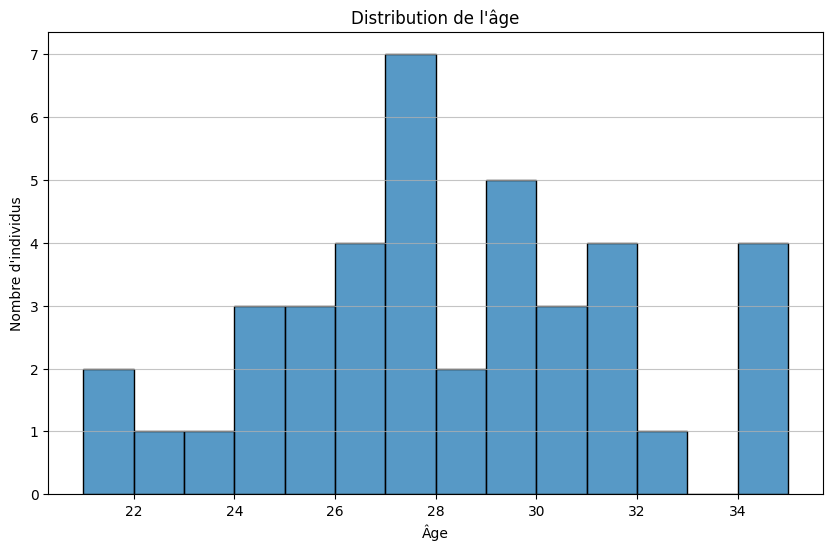

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['âge'], bins=len(df['âge'].unique()), kde=False)
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.ylabel("Nombre d'individus")
plt.grid(axis='y', alpha=0.75)
plt.show()

**Reasoning**:
The next step is to create a list of label-encoded categorical columns and then generate bar charts for each, using their original labels as per instructions 2 and 3 of the subtask.



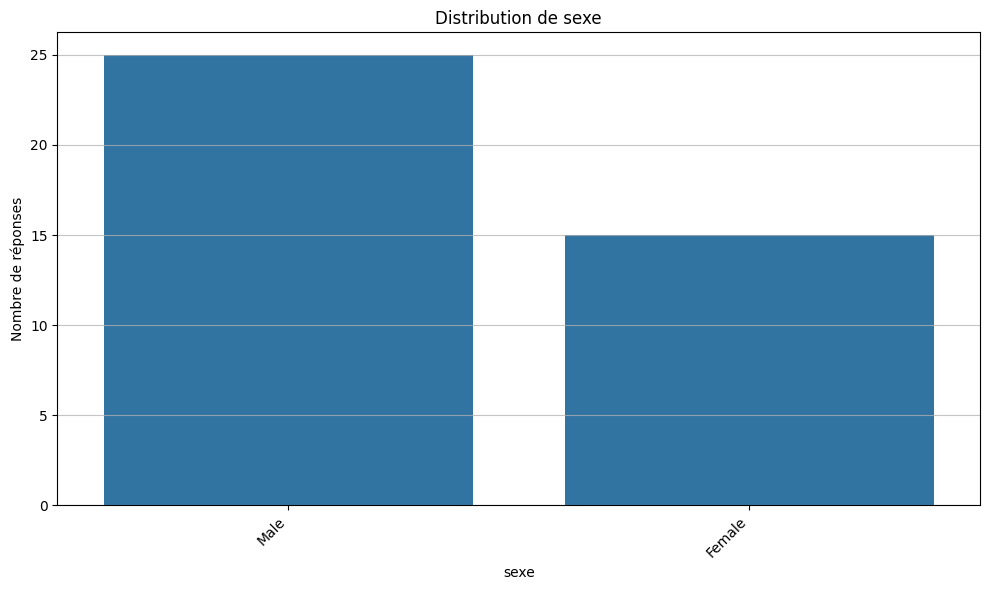

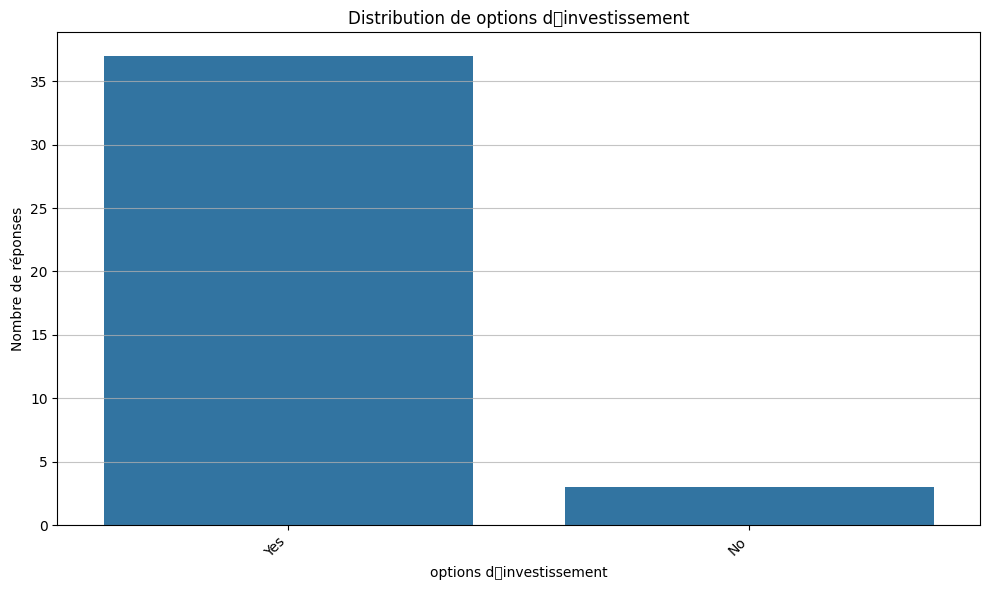

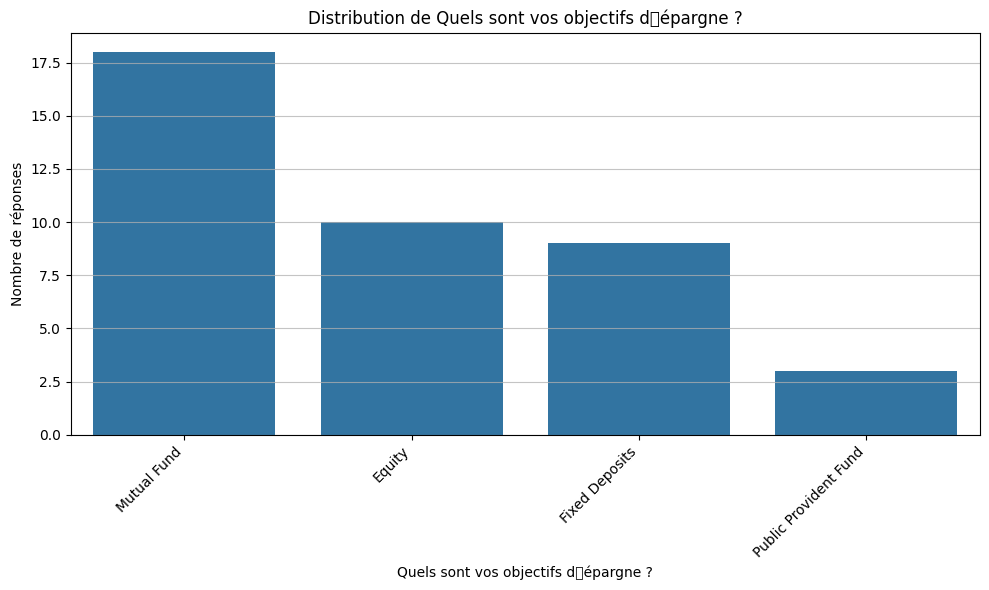

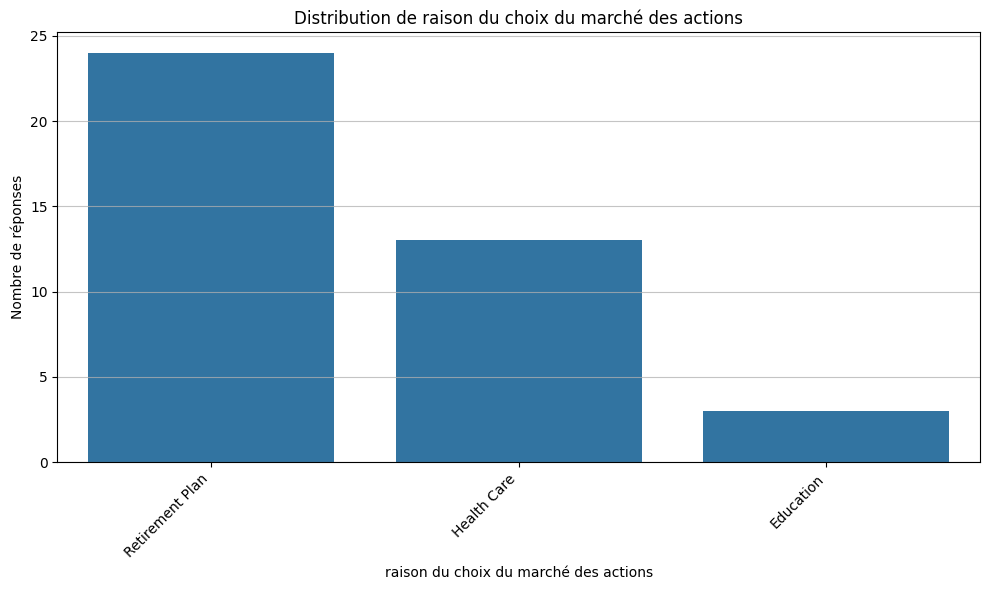

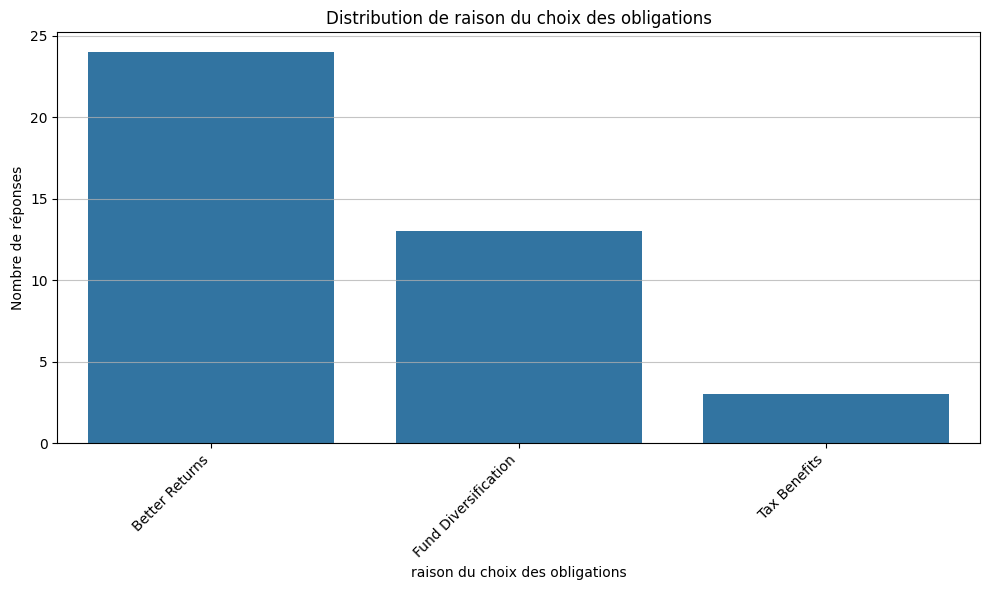

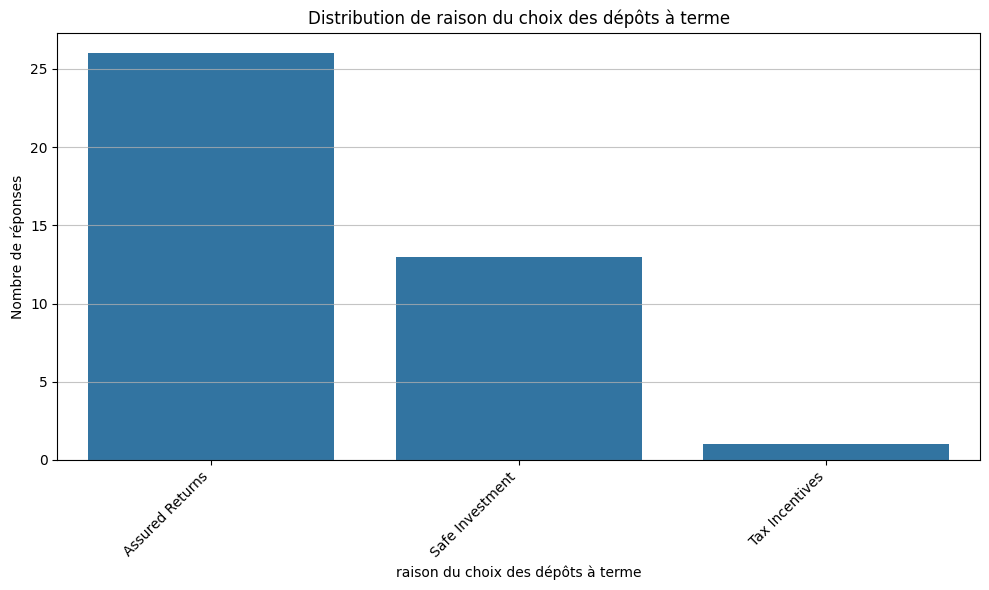

In [34]:
label_encoded_cols_to_plot = [
    'sexe',
    'options d\u0092investissement',
    'Quels sont vos objectifs d\u0092épargne ?',
    'raison du choix du marché des actions',
    'raison du choix des obligations',
    'raison du choix des dépôts à terme'
]

for col in label_encoded_cols_to_plot:
    plt.figure(figsize=(10, 6))

    # Retrieve value counts from the DataFrame
    value_counts = df[col].value_counts()

    # Use the stored LabelEncoder to get original labels
    encoder = label_encoders[col]
    original_labels = [encoder.inverse_transform([val])[0] for val in value_counts.index]

    sns.barplot(x=original_labels, y=value_counts.values)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre de réponses")
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

**Reasoning**:
Now, as per instruction 4 and 5 of the subtask, I will create bar charts for the 'levels of interest' columns, showing their distribution.



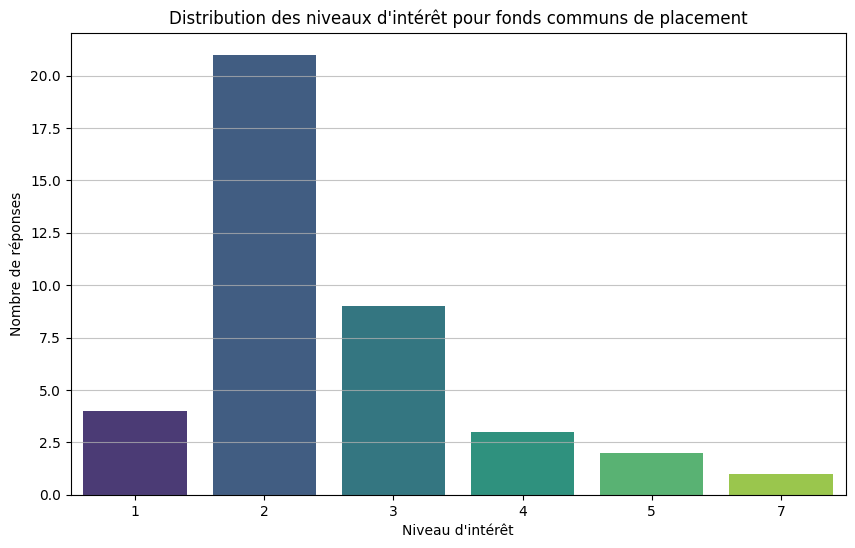

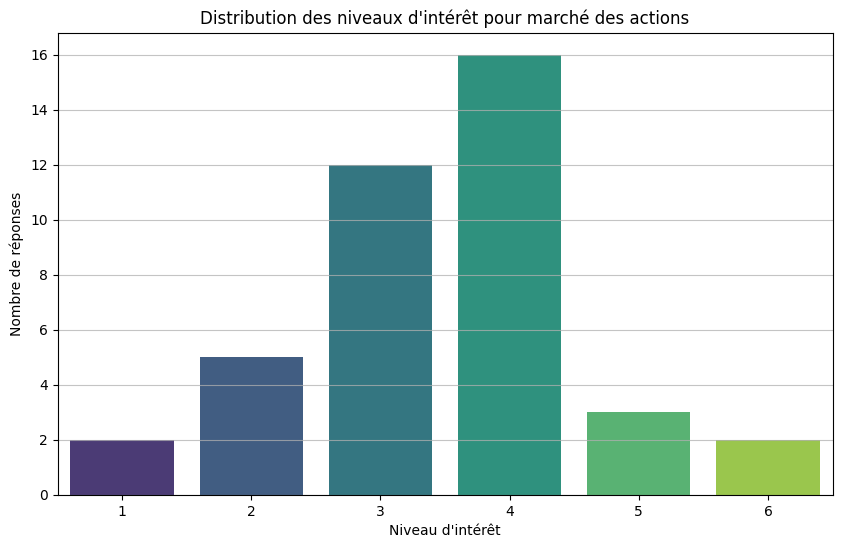

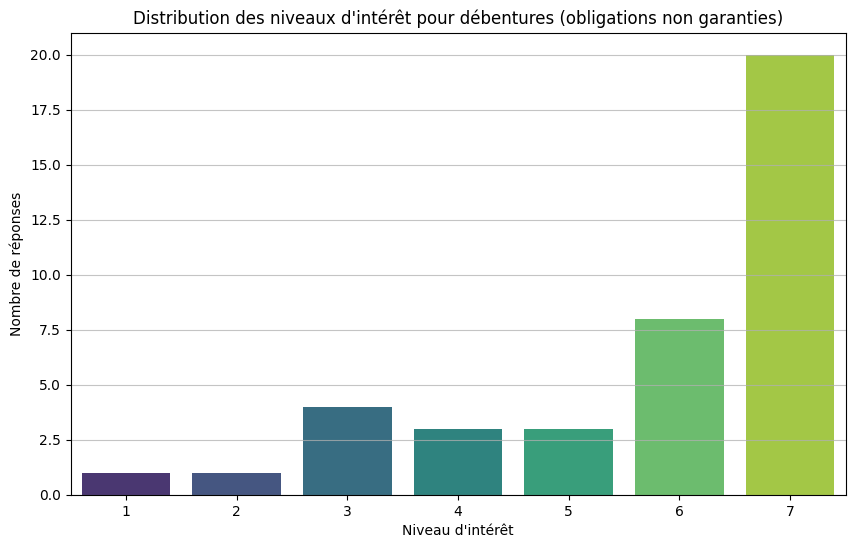

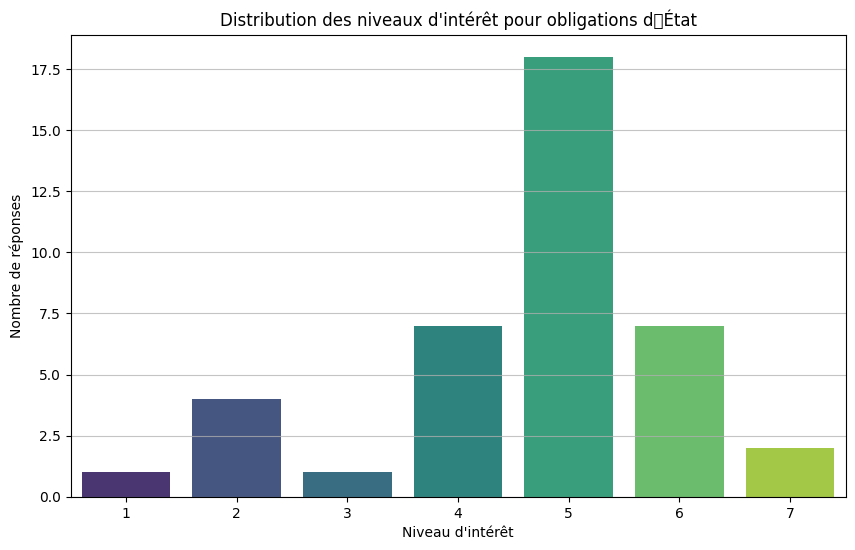

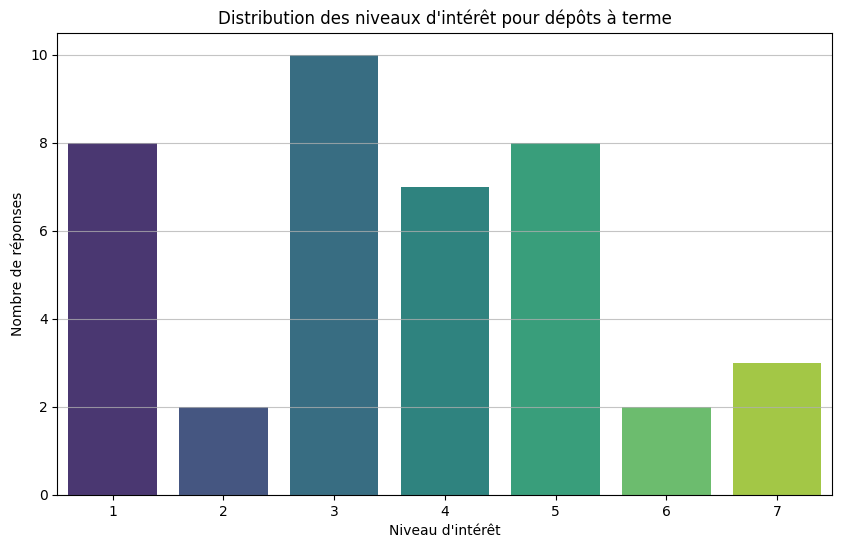

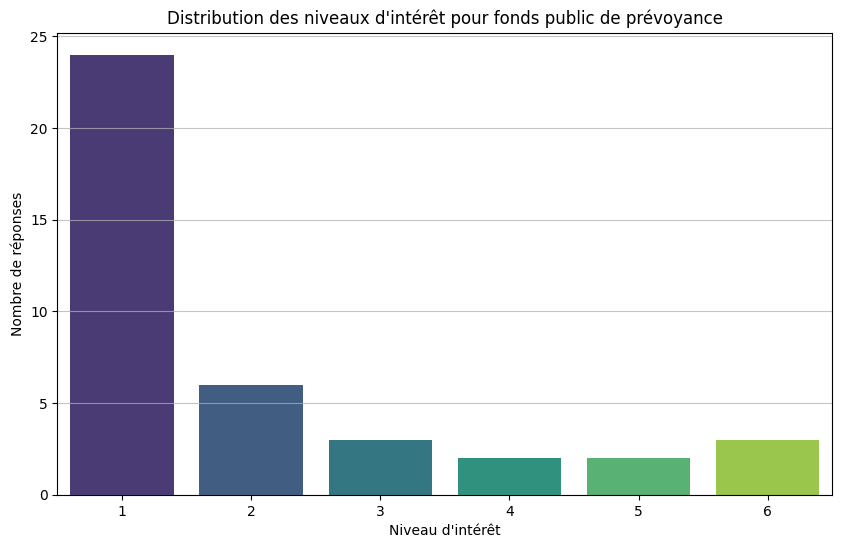

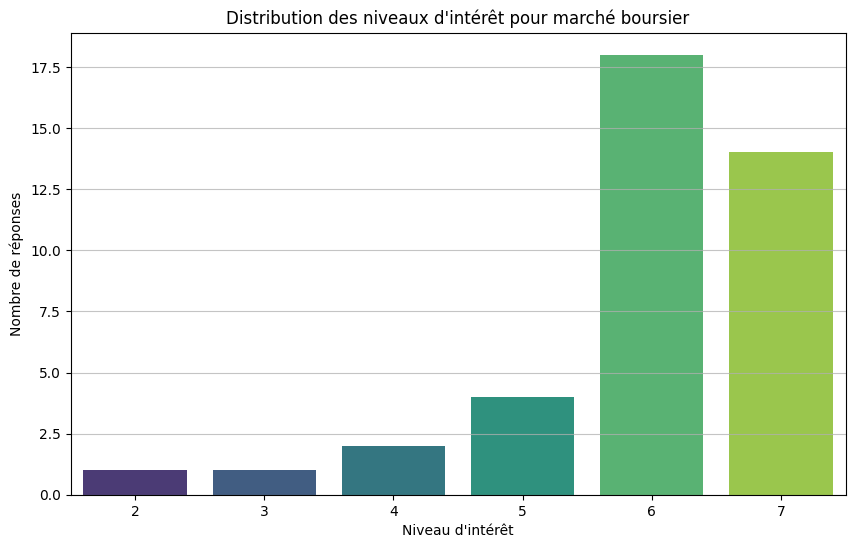

In [35]:
investment_interest_cols = [
    'fonds communs de placement',
    'marché des actions',
    'débentures (obligations non garanties)',
    'obligations d\u0092État',
    'dépôts à terme',
    'fonds public de prévoyance',
    'marché boursier'
]

for col in investment_interest_cols:
    plt.figure(figsize=(10, 6))
    value_counts = df[col].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f"Distribution des niveaux d'intérêt pour {col}")
    plt.xlabel("Niveau d'intérêt")
    plt.ylabel("Nombre de réponses")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## Exploration des Relations (Graphiques EDA)

### Subtask:
Visualiser les relations entre des paires de variables importantes, comme l'âge et les objectifs d'épargne, ou le sexe et les objectifs d'épargne, afin d'identifier des tendances ou des schémas. Les étiquettes d'origine seront utilisées.


**Reasoning**:
The first instruction is to visualize the relationship between 'âge' and 'Quels sont vos objectifs d'épargne ?' using a box plot or violin plot. I will retrieve the original labels for 'Quels sont vos objectifs d'épargne ?' from the stored LabelEncoder and create a temporary column in the DataFrame for plotting with these original labels.



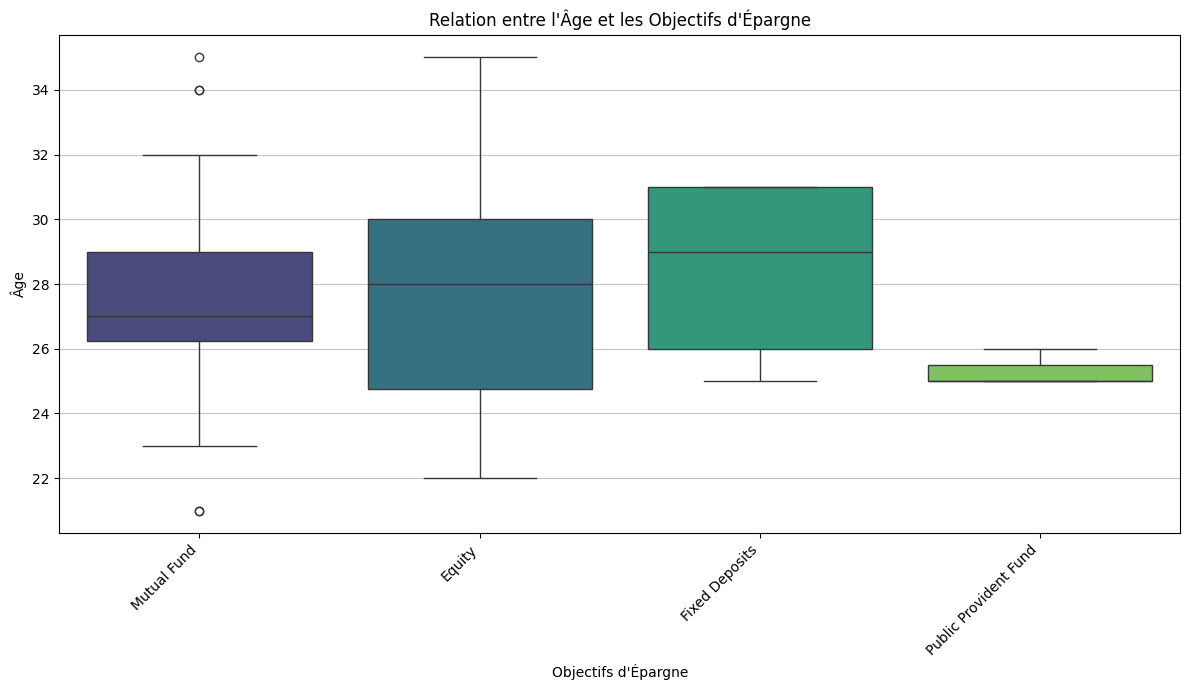

In [36]:
le_objectifs = label_encoders['Quels sont vos objectifs d\u0092épargne ?']
df['objectifs_epargne_original'] = df['Quels sont vos objectifs d\u0092épargne ?'].apply(lambda x: le_objectifs.inverse_transform([x])[0])

plt.figure(figsize=(12, 7))
sns.boxplot(x='objectifs_epargne_original', y='âge', data=df, palette='viridis')
plt.title("Relation entre l'Âge et les Objectifs d'Épargne")
plt.xlabel("Objectifs d'Épargne")
plt.ylabel("Âge")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
Now, I will generate a grouped bar chart to explore the relationship between 'sexe' and 'Quels sont vos objectifs d'épargne ?', using the original labels for both columns, as per the second instruction of the subtask.



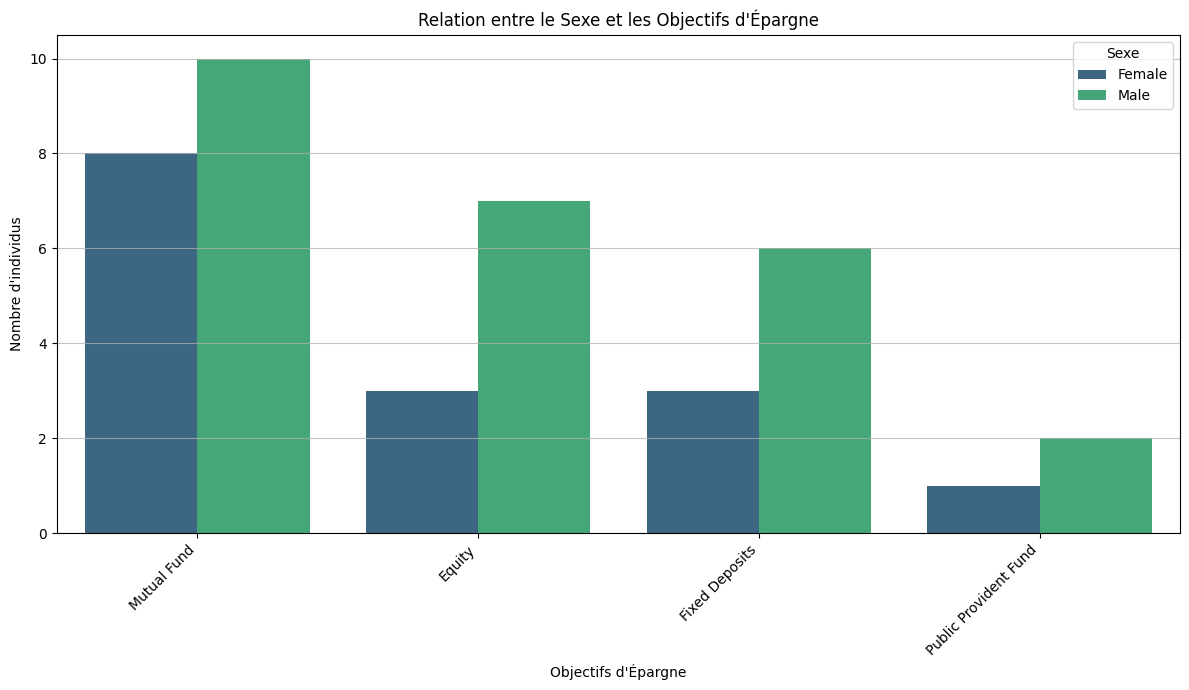

In [37]:
le_sexe = label_encoders['sexe']
df['sexe_original'] = df['sexe'].apply(lambda x: le_sexe.inverse_transform([x])[0])

plt.figure(figsize=(12, 7))
sns.countplot(x='objectifs_epargne_original', hue='sexe_original', data=df, palette='viridis')
plt.title("Relation entre le Sexe et les Objectifs d'Épargne")
plt.xlabel("Objectifs d'Épargne")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexe')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Analyse de la Matrice de Corrélation

### Subtask:
Calculer et afficher une matrice de corrélation (heatmap) pour toutes les colonnes numériques du DataFrame (y compris les colonnes catégorielles encodées). Cela permettra d'identifier les relations linéaires entre les variables et de guider la sélection des caractéristiques pour les modèles.


**Reasoning**:
First, I will select only the numerical columns from the DataFrame to calculate the correlation matrix, as the correlation matrix is only meaningful for numerical data. Then, I will compute the correlation matrix for these selected columns. Finally, I will display the correlation matrix as a heatmap with specified customizations.



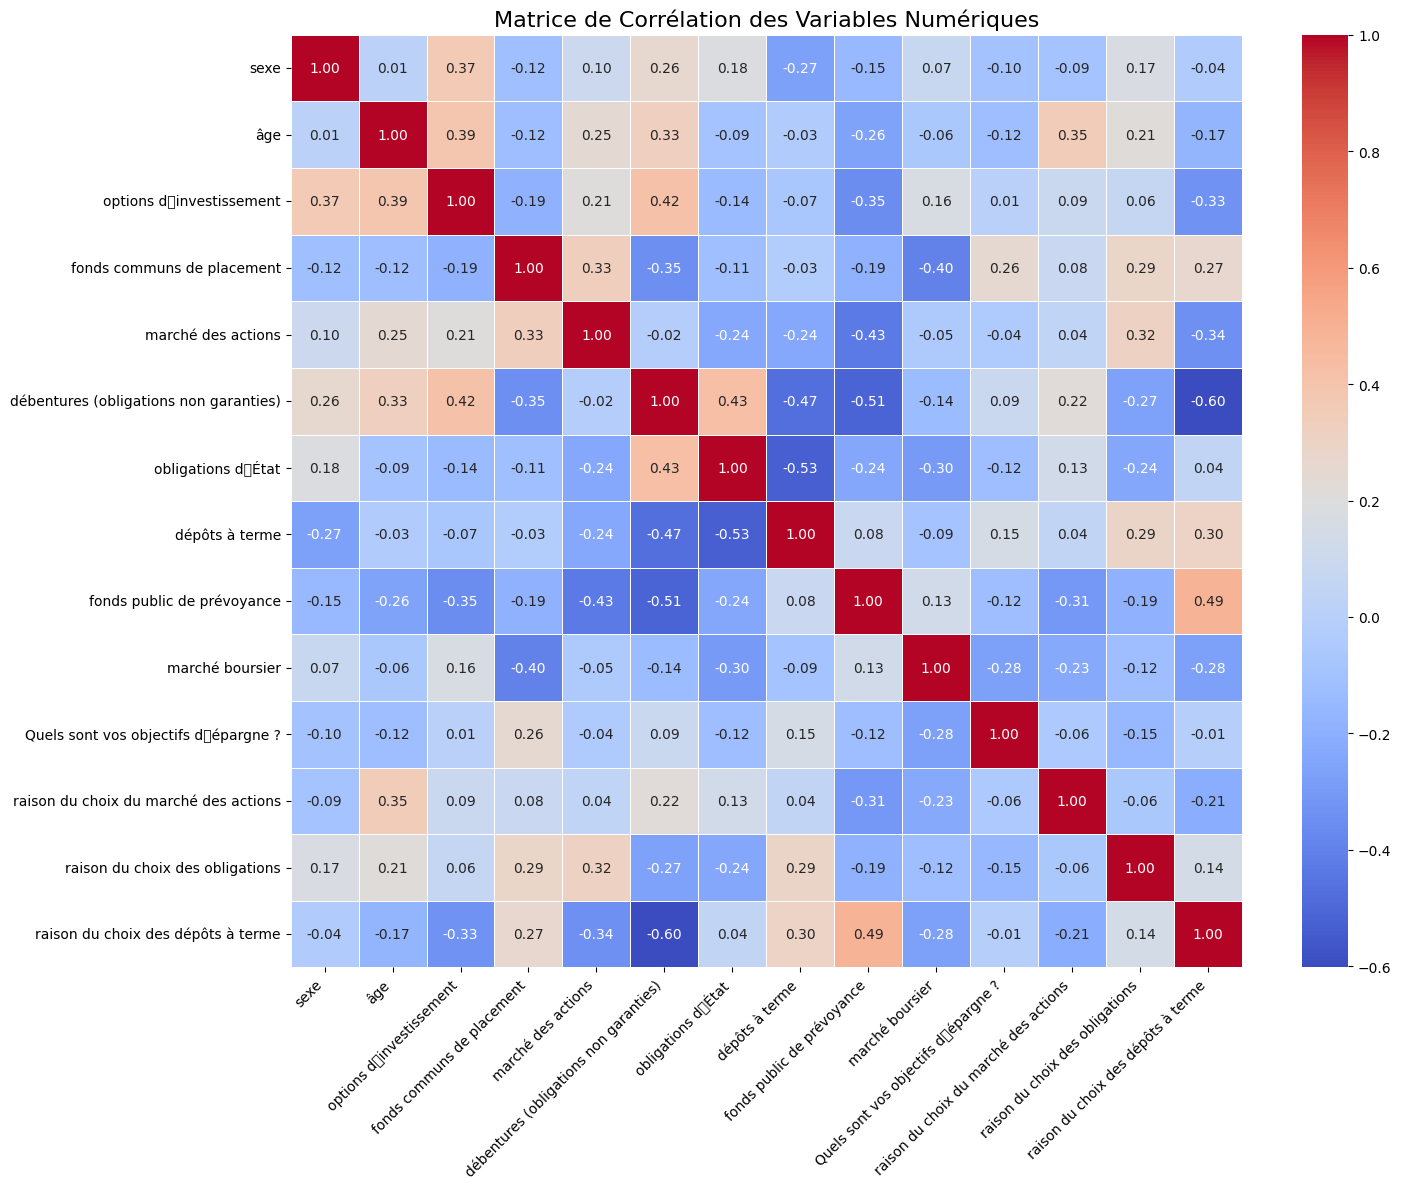

In [38]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Préparation des Données pour la Modélisation

### Subtask:
Vérifier et, si nécessaire, encoder toute colonne catégorielle restante qui serait pertinente pour la régression ou la classification, en s'assurant que toutes les données sont au format numérique requis.


**Reasoning**:
The first step is to identify all remaining categorical columns (object dtype) that have not yet been encoded. This will help us determine which columns need further processing for modeling.



In [39]:
remaining_object_cols = df.select_dtypes(include='object').columns
print("Remaining object columns to consider for encoding:")
print(remaining_object_cols)

Remaining object columns to consider for encoding:
Index(['facteur', 'objectif', 'but / finalité', 'durée',
       'suivi de linvestissement', 'attentes', 'option dinvestissement',
       'raison du choix des fonds communs', 'source', 'Source',
       'sexe_original', 'options_investissement_original',
       'objectifs_epargne_original', 'raison_marche_actions_original'],
      dtype='object')


**Reasoning**:
Now, I will remove the temporary columns created for visualization from the DataFrame, as instructed, before proceeding with encoding the remaining relevant categorical columns.



In [40]:
columns_to_drop = [col for col in df.columns if col.endswith('_original')]
df = df.drop(columns=columns_to_drop)

print(f"Dropped temporary columns: {columns_to_drop}")
print("DataFrame after dropping temporary columns:")
display(df.head())

Dropped temporary columns: ['sexe_original', 'options_investissement_original', 'objectifs_epargne_original', 'raison_marche_actions_original']
DataFrame after dropping temporary columns:


,sexe,âge,options dinvestissement,fonds communs de placement,marché des actions,débentures (obligations non garanties),obligations dÉtat,dépôts à terme,fonds public de prévoyance,marché boursier,...,suivi de linvestissement,attentes,option dinvestissement,Quels sont vos objectifs dépargne ?,raison du choix du marché des actions,raison du choix des fonds communs,raison du choix des obligations,raison du choix des dépôts à terme,source,Source
0,0,34,1,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,2,2,Capital Appreciation,0,1,Fixed Returns,Newspapers and Magazines
1,0,23,1,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,2,1,Dividend,0,1,High Interest Rates,Financial Consultants
2,1,30,1,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,0,2,Capital Appreciation,2,0,Fixed Returns,Television
3,1,22,1,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,0,2,Dividend,1,2,High Interest Rates,Internet
4,0,24,0,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,0,2,Capital Appreciation,0,1,Risk Free,Internet


**Reasoning**:
Now that the temporary columns for visualization have been removed, I will identify the truly remaining categorical columns and apply Label Encoding to them, storing each encoder in the `label_encoders` dictionary. This aligns with the third instruction of the subtask to ensure all relevant columns are numeric for modeling.



In [41]:
remaining_object_cols_for_encoding = df.select_dtypes(include='object').columns

for col in remaining_object_cols_for_encoding:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("--- Mappings for Newly Encoded Columns ---")
for col_name, encoder in label_encoders.items():
    if col_name in remaining_object_cols_for_encoding.values:
        print(f"\nColumn: {col_name}")
        unique_encoded_values = sorted(df[col_name].unique())
        for val in unique_encoded_values:
            original_value = encoder.inverse_transform([val])[0]
            print(f"  {val} -> {original_value}")


--- Mappings for Newly Encoded Columns ---

Column: facteur
  0 -> No
  1 -> Yes

Column: objectif
  0 -> Locking Period
  1 -> Returns
  2 -> Risk

Column: but / finalité
  0 -> Capital Appreciation
  1 -> Growth
  2 -> Income

Column: durée
  0 -> Returns
  1 -> Savings for Future
  2 -> Wealth Creation

Column: suivi de linvestissement
  0 -> 1-3 years
  1 -> 3-5 years
  2 -> Less than 1 year
  3 -> More than 5 years

Column: attentes
  0 -> Daily
  1 -> Monthly
  2 -> Weekly

Column: option dinvestissement
  0 -> 10%-20%
  1 -> 20%-30%
  2 -> 30%-40%

Column: raison du choix des fonds communs
  0 -> Capital Appreciation
  1 -> Dividend
  2 -> Liquidity

Column: source
  0 -> Fixed Returns
  1 -> High Interest Rates
  2 -> Risk Free

Column: Source
  0 -> Financial Consultants
  1 -> Internet
  2 -> Newspapers and Magazines
  3 -> Television


**Reasoning**:
Now that all relevant categorical columns have been encoded, I will display `df.info()` to verify that all columns are of a numerical data type, as per the fourth instruction of the subtask.



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   sexe                                    40 non-null     int64
 1   âge                                     40 non-null     int64
 2   options dinvestissement                40 non-null     int64
 3   fonds communs de placement              40 non-null     int64
 4   marché des actions                      40 non-null     int64
 5   débentures (obligations non garanties)  40 non-null     int64
 6   obligations dÉtat                      40 non-null     int64
 7   dépôts à terme                          40 non-null     int64
 8   fonds public de prévoyance              40 non-null     int64
 9   marché boursier                         40 non-null     int64
 10  facteur                                 40 non-null     int64
 11  objectif             

## Modélisation par Régression Linéaire

### Subtask:
Sélectionner une variable cible numérique et des variables explicatives pour construire un modèle de régression linéaire simple. Le modèle sera entraîné et ses performances initiales seront évaluées.


### Choix de la Variable Cible et des Variables Explicatives

Pour ce modèle de régression linéaire, nous choisirons la colonne 'âge' comme variable cible (y), car c'est une variable numérique continue qui pourrait être intéressante à prédire. Pour les variables explicatives (X), nous utiliserons les colonnes numériques encodées qui représentent les différentes options d'investissement, les préférences, et les raisons de choix, afin d'explorer leur impact sur l'âge.

**Reasoning**:
As per the instructions, the next step is to define the target variable (y) and explanatory variables (X), then split the data into training and testing sets, initialize and train a linear regression model, make predictions, and evaluate its performance using R-squared and MSE.



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Choose target and explanatory variables
y = df['âge']

# Exclude 'âge' itself from features, and any other columns that are not meant to be predictors for age.
# 'sexe', 'options d\u0092investissement', 'Quels sont vos objectifs d\u0092épargne ?', 'raison du choix du marché des actions',
# 'raison du choix des obligations', 'raison du choix des dépôts à terme' are already encoded.
# All other numerical columns (investment interest levels, 'facteur', 'objectif', etc.) are potential features.

# Selecting all numerical columns except the target 'âge'
X = df.drop(columns=['âge'])

# 2. Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize a Linear Regression model
model = LinearRegression()

# 4. Train the model on the training data
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

R-squared: -2.2299
Mean Squared Error (MSE): 24.2244


## Modélisation par Classification

### Subtask:
Sélectionner une variable cible catégorielle et des variables explicatives pour construire un modèle de classification simple. Le modèle sera entraîné et ses performances initiales seront évaluées.


### Choix de la Variable Cible et des Variables Explicatives

Pour ce modèle de classification, nous choisirons la colonne `'options dinvestissement'` comme variable cible (y), car c'est une variable catégorielle binaire que nous avons encodée en 0 et 1. Pour les variables explicatives (X), nous utiliserons toutes les autres colonnes numériques du DataFrame, y compris les variables démographiques, les niveaux d'intérêt pour différents placements, et les raisons de choix encodées.

**Reasoning**:
Following the instructions, I will now implement the classification model. This involves defining the target and explanatory variables, splitting the data, initializing and training a Logistic Regression model, making predictions, and finally evaluating its performance using accuracy, classification report, and confusion matrix.



In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Choose target variable (y)
y = df['options d\u0092investissement']

# 2. Select all other numerical columns as explanatory variables (X)
# Exclude the target variable from features
X = df.drop(columns=['options d\u0092investissement'])

# 3. Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize a Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for small datasets

# 5. Train the model on the training data
model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8


Confusion Matrix:
[[0 2]
 [0 6]]


## Final Task

### Subtask:
Synthétiser toutes les découvertes issues de l'analyse exploratoire des données, de la matrice de corrélation, de la régression linéaire et de la classification, pour dresser un portrait complet des profils d'investisseurs et de leurs préférences.


## Summary:

### Data Analysis Key Findings

*   **Age Distribution:** A histogram was generated to visualize the distribution of age among individuals, providing insights into the age demographics of the respondents.
*   **Categorical Variable Distributions:** Bar charts revealed the distributions of key categorical variables including 'sexe', 'options d'investissement', 'Quels sont vos objectifs d'épargne ?', and reasons for choosing specific financial products (e.g., 'marché des actions', 'obligations', 'dépôts à terme'). These charts, using original labels, highlighted prevalent choices and preferences.
*   **Investment Interest Levels:** Bar charts displayed the distribution of interest levels for various investment types such as 'fonds communs de placement', 'marché des actions', 'débentures', 'obligations d'État', 'dépôts à terme', 'fonds public de prévoyance', and 'marché boursier'.
*   **Relationship between Age and Savings Objectives:** A box plot illustrated that different age groups may pursue distinct savings objectives. For instance, specific age ranges might show a higher median age for certain goals compared to others.
*   **Relationship between Gender and Savings Objectives:** A grouped bar chart indicated potential differences in savings objectives between genders, showing how each gender is represented across various goals.
*   **Correlation Analysis:** A heatmap of the correlation matrix for all numerical variables (including encoded categorical ones) was generated. This revealed linear relationships between variables, such as potential correlations between demographic features and investment preferences or choices.
*   **Data Preparation:** All remaining categorical columns in the dataset were successfully label-encoded, transforming the entire dataset into a numerical format suitable for machine learning models.
*   **Linear Regression Model Performance (Predicting Age):** A linear regression model attempting to predict 'âge' achieved an R-squared of -2.2299 and a Mean Squared Error (MSE) of 24.2244. The negative R-squared indicates that the model performs worse than simply predicting the mean age, suggesting that the selected features are not good linear predictors of age, or a linear model is not appropriate.
*   **Classification Model Performance (Predicting Investment Options):** A logistic regression model for classifying 'options d'investissement' achieved an accuracy of 0.75. However, the model completely failed to predict class 0 (precision, recall, and f1-score of 0.00 for class 0), while performing well for class 1 (precision of 0.75, recall of 1.00, f1-score of 0.86). This suggests significant class imbalance or a lack of distinguishing features for class 0.

### Insights or Next Steps

*   **Refine Investor Segmentation:** Leverage the detailed distribution and relationship analyses (EDA) to build comprehensive investor profiles based on age, gender, investment options, savings objectives, and reasons for choices. This can inform targeted marketing and product development strategies.
*   **Enhance Predictive Models:** Given the poor performance of the initial linear regression model and the classification model's inability to predict a specific class, future steps should include:
    *   **Feature Engineering:** Explore creating new features from existing ones or using polynomial features.
    *   **Alternative Models:** Consider non-linear regression models (e.g., Random Forest, Gradient Boosting) for age prediction and more robust classification algorithms (e.g., Support Vector Machines, Gradient Boosting Classifiers) or techniques to address class imbalance (e.g., SMOTE) for investment options prediction.
